In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs

In [3]:
# load data
lon = np.load("lon.npy")
lat = np.load("lat.npy")
gpi = np.load("gpi.npy")

In [4]:
# fill nans artificially
i = np.argmin(np.abs(lon - 140))
j = np.argmin(np.abs(lat - 30))
gpi[j:j+30, i:i+30] = np.nan

i = np.argmin(np.abs(lon - 150))
j = np.argmin(np.abs(lat - 40))
gpi[j:j+30, i:i+30] = np.nan

In [5]:
# plot settings
levels = np.arange(-5, 5 + 0.1, 1)
norm = Normalize(vmin=-5, vmax=5)
extent = [110, 160, 20, 50]

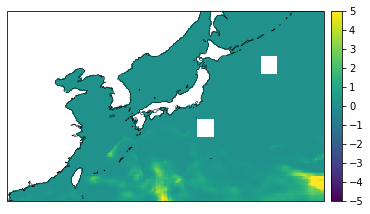

In [6]:
#plot data using pcolormesh with cartopy
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=135))
ax.coastlines(resolution='50m', lw=0.5)
ax.set_extent(extent, ccrs.PlateCarree())
mappable = ax.pcolormesh(
    lon, lat, gpi, 
    norm=norm,
    transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(
    size=0.15,
    pad=0.1,
    axes_class=plt.Axes)
fig.add_axes(ax_cb)
fig.colorbar(
    mappable,
    cax=ax_cb,
    ticks=levels,
    orientation="vertical",
    shrink=0.8,
    aspect=30)
plt.show()

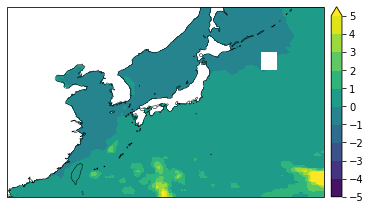

In [7]:
#plot data using contourf with cartopy
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=145))
ax.coastlines(resolution='50m', lw=0.5)
ax.set_extent(extent, ccrs.PlateCarree())
mappable = ax.contourf(
    lon, lat, gpi, 
    levels=levels,
    extend="max",
    transform=ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(
    size=0.15,
    pad=0.1,
    axes_class=plt.Axes)
fig.add_axes(ax_cb)
fig.colorbar(
    mappable,
    cax=ax_cb,
    ticks=levels,
    orientation="vertical",
    shrink=0.8,
    aspect=30)
plt.show()

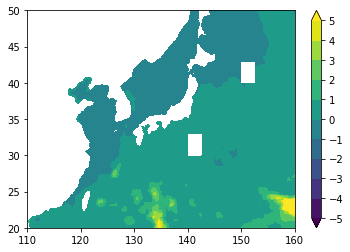

In [8]:
#plot data using contourf without cartopy
plt.contourf(
    lon, lat, gpi, 
    levels=levels,
    extend="both")
plt.xlim([110, 160])
plt.ylim([20, 50])
plt.colorbar(ticks=levels)
plt.show()